0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
Finished Training. 
 MSE: 1.3333312122161107
Aca
0.999998377190864
Test Acurracy: 0.0
Test MSE = 3.9999935087660896
0
Finished Training. 
 MSE: 0.009644782088628089
Aca
-0.11908284538544334
Test Acurracy: 0.0
Test MSE = 1.25234641483598
0
Finished Training. 
 MSE: 0.009951573923939526
Aca
0.23939468771053707
Test Acurracy: 1.0
Test MSE = 0.5785204410829514
0
1000
2000
Finished Training. 
 MSE: 0.009995415904395236
Aca
-0.8611112286150804
Test Acurracy: 0.0
Test MSE = 3.463735005277134
0
Finished Training. 
 MSE: 0.00994878085397504
Aca
-0.8859252189021536
Test Acurracy: 0.0
Test MSE = 3.556713931291136
0
Finished Training. 
 MSE: 0.009922537718989093
Aca
-0.8607393689078471
Test Acurracy: 1.0
Test MSE = 0.01939352337218471
0
Finished Training. 
 MSE: 0.009999057934302964
Aca
-0.7882529877242987
Test Acurracy: 1.0
Test MSE = 0.04483679720768598
0
1000
2000
3000
4000
5000
6000
7000
8000
Finished Training. 
 MSE:

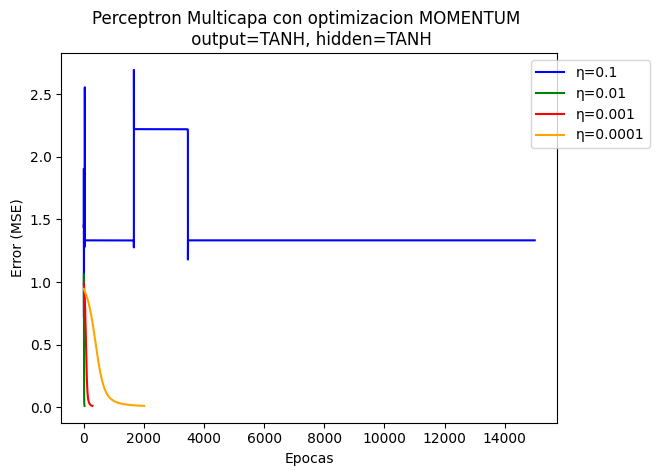

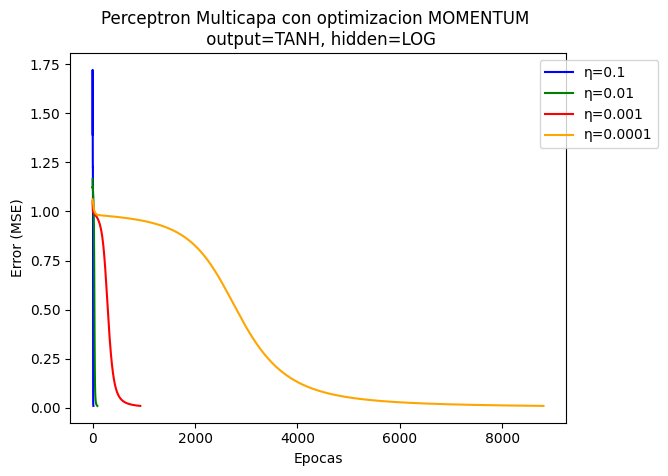

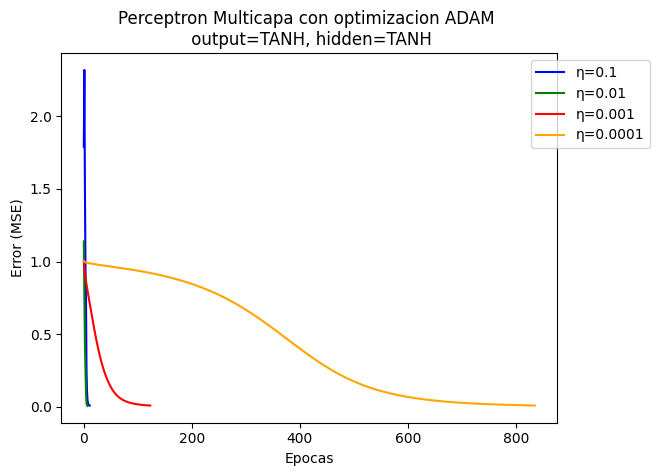

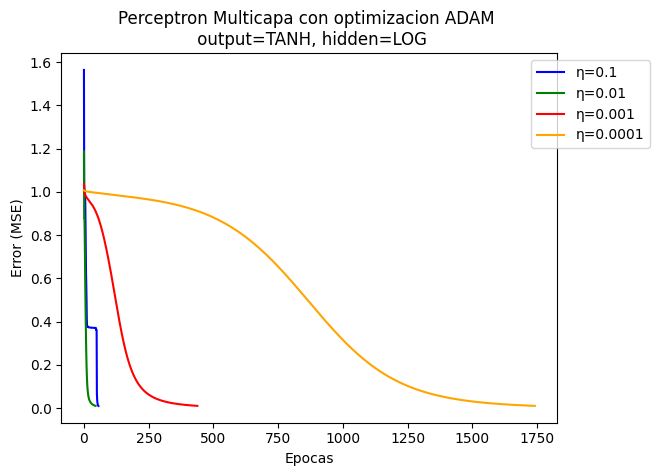

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import parse_nums
from src.perceptron import MultilayerPerceptron

PATH = "./data/Ej3B-digitos.txt"

OUTPUT_ACTIVATION = ["TANH"]
HIDDEN_ACTIVATION = ["TANH", "LOG"]
BETA = 1

TRAINING_TYPE = "PERCENTAGE"
K_FOLD = 4
LR = 0.1
BIAS = 1
EPOCHS = 15000
MIN_ERROR = 0.01
TRAINING_PERCENTAGE = 0.9

QTY_HIDDEN_LAYERS = 2
QTY_NODES_IN_HIDDEN_LAYERS = [16, 10]

OPTIMIZER_METHOD = ["MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8

input_data, expected_data = parse_nums(PATH, 7, 2)

#-------------------------------------------------
# VARIANDO EL LEARNING RATE
#-------------------------------------------------

arr_of_errors = []
arr_of_epochs = []
lrs = [round(LR*(10**(-i)),4) for i in range(4)]

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    arr_of_error_aux = []
    arr_of_epochs_aux = []
    for out_act in OUTPUT_ACTIVATION:
        arr_of_error_aux2 = []
        arr_of_epochs_aux2 = []
        for hidden_act in HIDDEN_ACTIVATION:
            arr_of_error_aux3 = []
            arr_of_epochs_aux3 = []
            for lr in lrs:
                perceptron = MultilayerPerceptron(input_data, expected_data, lr, BIAS,
                                                EPOCHS, TRAINING_TYPE, TRAINING_PERCENTAGE, K_FOLD, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                out_act, hidden_act, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON, [-1,1])
                mse_errors, total_epochs, acurracy, test_mse = perceptron.train()
                arr_of_error_aux3.append(mse_errors)
                arr_of_epochs_aux3.append(total_epochs)

            arr_of_error_aux2.append(arr_of_error_aux3)
            arr_of_epochs_aux2.append(arr_of_epochs_aux3)

        arr_of_error_aux.append(arr_of_error_aux2)
        arr_of_epochs_aux.append(arr_of_epochs_aux2)

    arr_of_errors.append(arr_of_error_aux)
    arr_of_epochs.append(arr_of_epochs_aux)
    
colors = ['blue', 'green', 'red', 'orange']

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    for j, out_act in enumerate(OUTPUT_ACTIVATION):
        for k, hidden_act in enumerate(HIDDEN_ACTIVATION):
            for s in range(len(arr_of_errors[i][j][k])):
                plt.plot(range(arr_of_epochs[i][j][k][s]), arr_of_errors[i][j][k][s], color=colors[s], label=f"η={lrs[s]}")
            plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={out_act}, hidden={hidden_act}')
            plt.xlabel("Epocas")
            plt.ylabel("Error (MSE)")
            plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
            plt.show()
       

0
Finished Training. 
 MSE: 0.009998894924274884
Aca
0.22715434289388714
0.22510957772074547
0.6352471645416675
-0.7732891337166836
-0.7473321696797548
0.8529494294315261
Test Acurracy: 0.3333333333333333
Test MSE = 1.4678376577068664
-------------- Entrenamiento con p=0.4----------------
-0.854248110893062
0.9453960710405871
0.8972900991357786
0.9288013107139932
Test Acurracy: 1.0
Test MSE = 0.009960944831907325
------------------------------
0
Finished Training. 
 MSE: 0.009996402463398365
Aca
-0.7976323425856224
0.8018966545836672
0.4333991406122071
-0.2563990760003244
-0.11517109886747146
-0.8714996320595958
Test Acurracy: 0.5
Test MSE = 1.0745797198184586
-------------- Entrenamiento con p=0.4----------------
-0.8759345187179898
0.9256075265392312
-0.9343213912461852
0.8792044496687126
Test Acurracy: 1.0
Test MSE = 0.009957932095255825
------------------------------
0
Finished Training. 
 MSE: 0.009973091907120035
Aca
0.9054137133897839
-0.9304804887930801
0.7233059506753436
-0.50

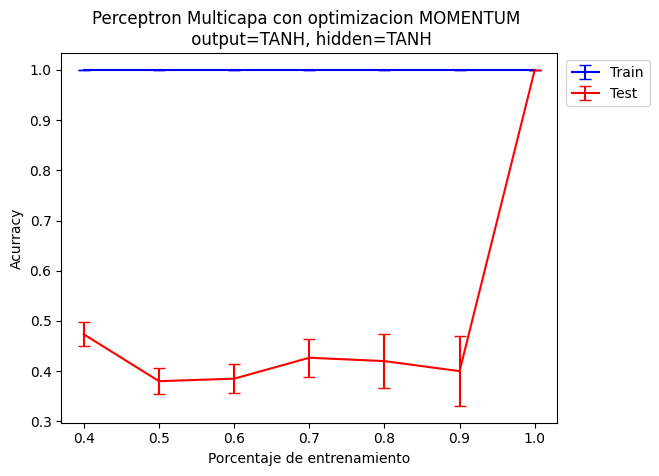

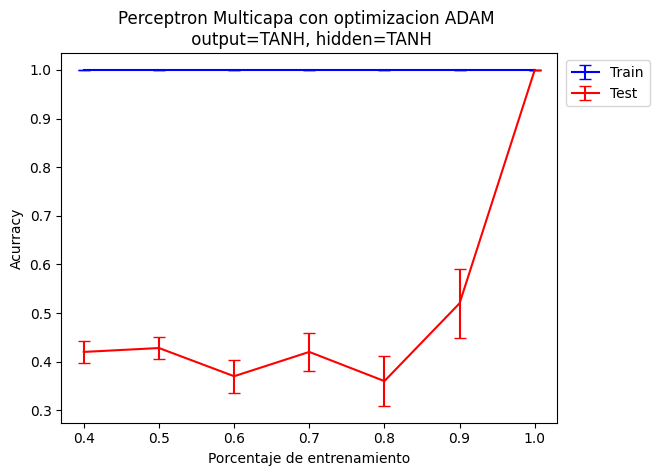

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from src.utils import parse_nums
from src.perceptron import MultilayerPerceptron

#-------------------------------------------------
# VARIANDO EL PORCENTAJE DE ENTRENAMIENTO
#-------------------------------------------------

PATH = "./data/Ej3B-digitos.txt"
OUTPUT_ACTIVATION = "TANH"
HIDDEN_ACTIVATION = "TANH"
BETA = 1.0

TRAINING_TYPE = "PERCENTAGE"
LR = 0.001
BIAS = 1
EPOCHS = 50000
MIN_ERROR = 0.01

QTY_HIDDEN_LAYERS = 2
QTY_NODES_IN_HIDDEN_LAYERS = [16, 10]

OPTIMIZER_METHOD = ["MOMENTUM", "ADAM"]
K_FOLD = 4
ALPHA = 0.8
BETA1 = 0.9
BETA2 = 0.999
EPSILON = 1e-8
TRAIN_PERCENTAGES = [round(0.1*i,2) for i in range(4,11)]
ITERATIONS = 50

input_data, expected_data = parse_nums(PATH, 7, 2)

arr_avg_train_mses = []
arr_std_train_mses = []
arr_avg_test_mses = []
arr_std_test_mses = []

for i, opt_method in enumerate(OPTIMIZER_METHOD):
    avg_train_mses = []
    std_train_mses = []
    avg_test_mses = []
    std_test_mses = []
    for p in TRAIN_PERCENTAGES:
        train = []
        test = []
        for iter in range(ITERATIONS):
            perceptron = MultilayerPerceptron(input_data, expected_data, LR, BIAS,
                                                EPOCHS, TRAINING_TYPE, p, K_FOLD, MIN_ERROR,
                                                QTY_HIDDEN_LAYERS, QTY_NODES_IN_HIDDEN_LAYERS, 
                                                OUTPUT_ACTIVATION, HIDDEN_ACTIVATION, BETA,
                                                opt_method, ALPHA, BETA1, BETA2, EPSILON,  [-1,1])
            mse_errors, total_epochs, test_acurracy, test_mse = perceptron.train()
            #Testeo con el que entrene
            print(f"-------------- Entrenamiento con p={p}----------------")
            if(p == 1):
                train_acurracy, train_mse = perceptron.test(perceptron.input_data, perceptron.expected_data)
            else:
                train_acurracy, train_mse = perceptron.test(perceptron.train_input_data, perceptron.train_expected_data)
            print("------------------------------")
            train.append(train_acurracy)
            test.append(test_acurracy)
            
        train_aux = sum(train) / len(train)
        avg_train_mses.append(train_aux)
        error_train = np.std(train) / np.sqrt((len(train)))
        std_train_mses.append(error_train)
        
        test_aux = sum(test) / len(test)
        avg_test_mses.append(test_aux)
        error_test = np.std(test) / np.sqrt((len(test)))
        std_test_mses.append(error_test)
                    
    arr_avg_train_mses.append(avg_train_mses)
    arr_std_train_mses.append(std_train_mses)
    arr_avg_test_mses.append(avg_test_mses)
    arr_std_test_mses.append(std_test_mses)
    
for i, opt_method in enumerate(OPTIMIZER_METHOD):
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_train_mses[i], yerr=arr_std_train_mses[i], color="blue", capsize=4, label="Train")
    plt.errorbar(TRAIN_PERCENTAGES, arr_avg_test_mses[i], yerr=arr_std_test_mses[i], color="red", capsize=4, label="Test")
    plt.title(f'Perceptron Multicapa con optimizacion {opt_method} \n output={OUTPUT_ACTIVATION}, hidden={HIDDEN_ACTIVATION}')
    plt.xlabel("Porcentaje de entrenamiento")
    plt.ylabel("Acurracy")
    plt.legend(loc='best', bbox_to_anchor=(1.2, 1.0))
    plt.show()